In [68]:
import pandas as pd
import os
from matplotlib import pyplot as plt

In [9]:
fname = 'default of credit card clients.xls'
fpath = '/home/vega/Downloads'


In [36]:
data = pd.read_excel(os.path.join(fpath, fname), sheet_name='Data')

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 

X2: Gender (1 = male; 2 = female). 

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 

X4: Marital status (1 = married; 2 = single; 3 = others). 

X5: Age (year). 

X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [37]:
data.shape

(30001, 24)

    Clean up the data, take the firs trow as header

In [38]:
data = data.rename(columns = data.iloc[0]).drop(data.index[0])

In [39]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


    Gender

In [41]:
df = data.copy()
total = df.shape[0]
female = df[df['SEX'] == 2].shape[0]
male = df[df['SEX'] == 1].shape[0]
print(f"female ={female}, {female/total*100}%")
print(f"male ={male}, {male/total*100}%")

female =18112, 60.373333333333335%
male =11888, 39.626666666666665%


    Education
    (1 = graduate school; 2 = university; 3 = high school; 4 = others).



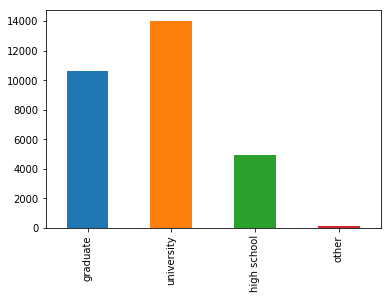

In [96]:
edu = df['EDUCATION'].value_counts().sort_index()
edu[edu.index.isin([1,2,3,4])].rename(index={1:'graduate', 2:'university', 3:'high school', 4:'other'}).plot(kind='bar')


1       2
6       1
9       3
48      5
359     4
503     6
3770    0
Name: EDUCATION, dtype: object